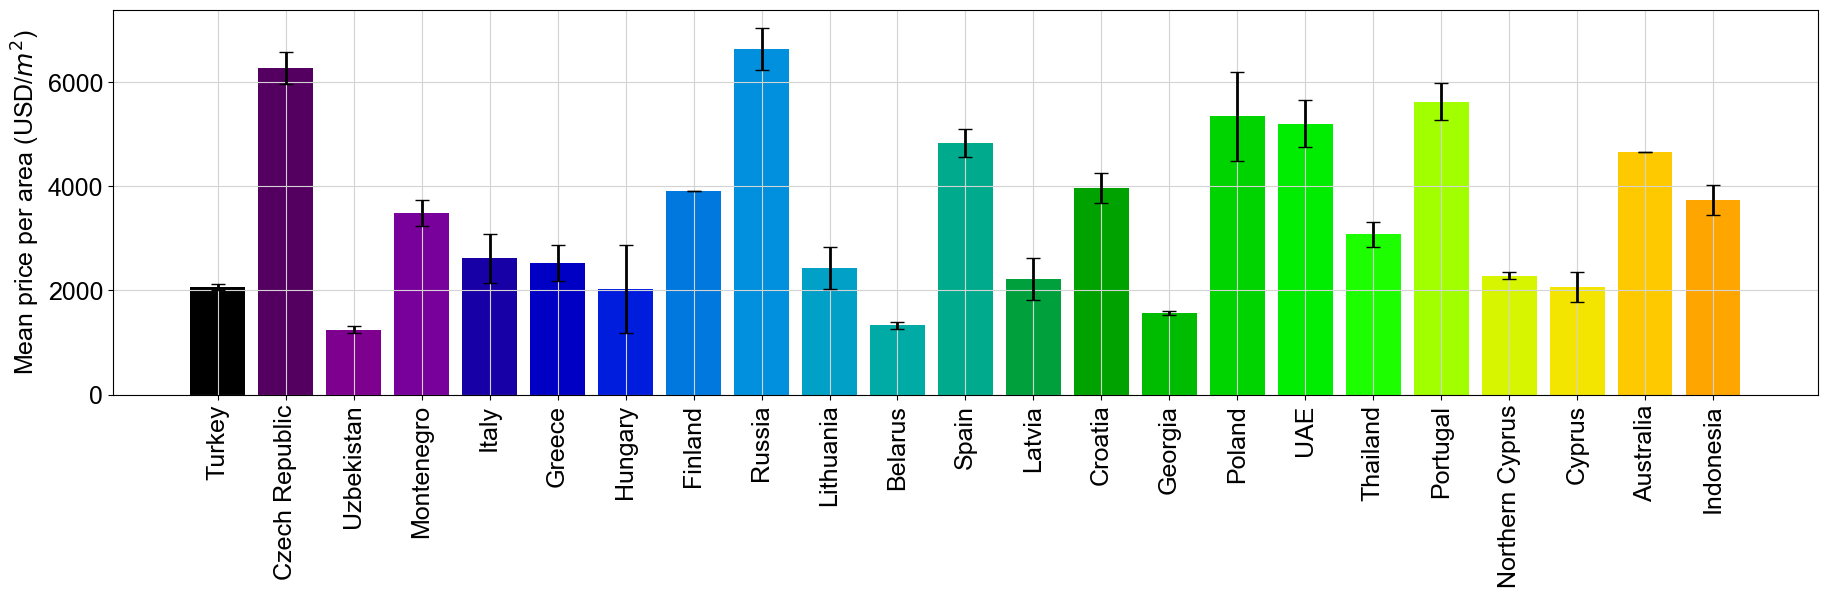

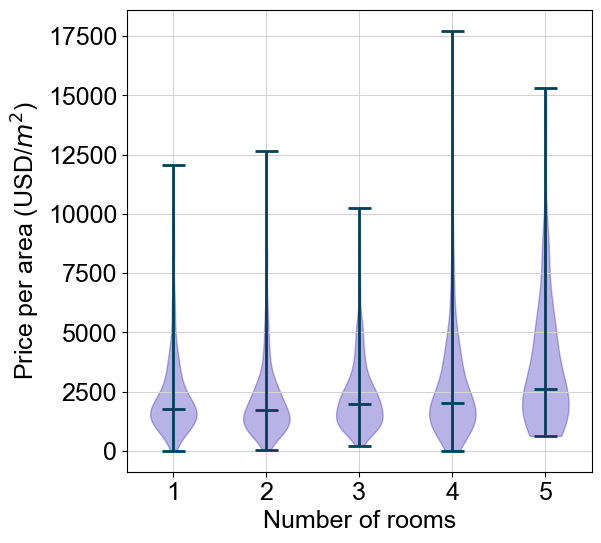

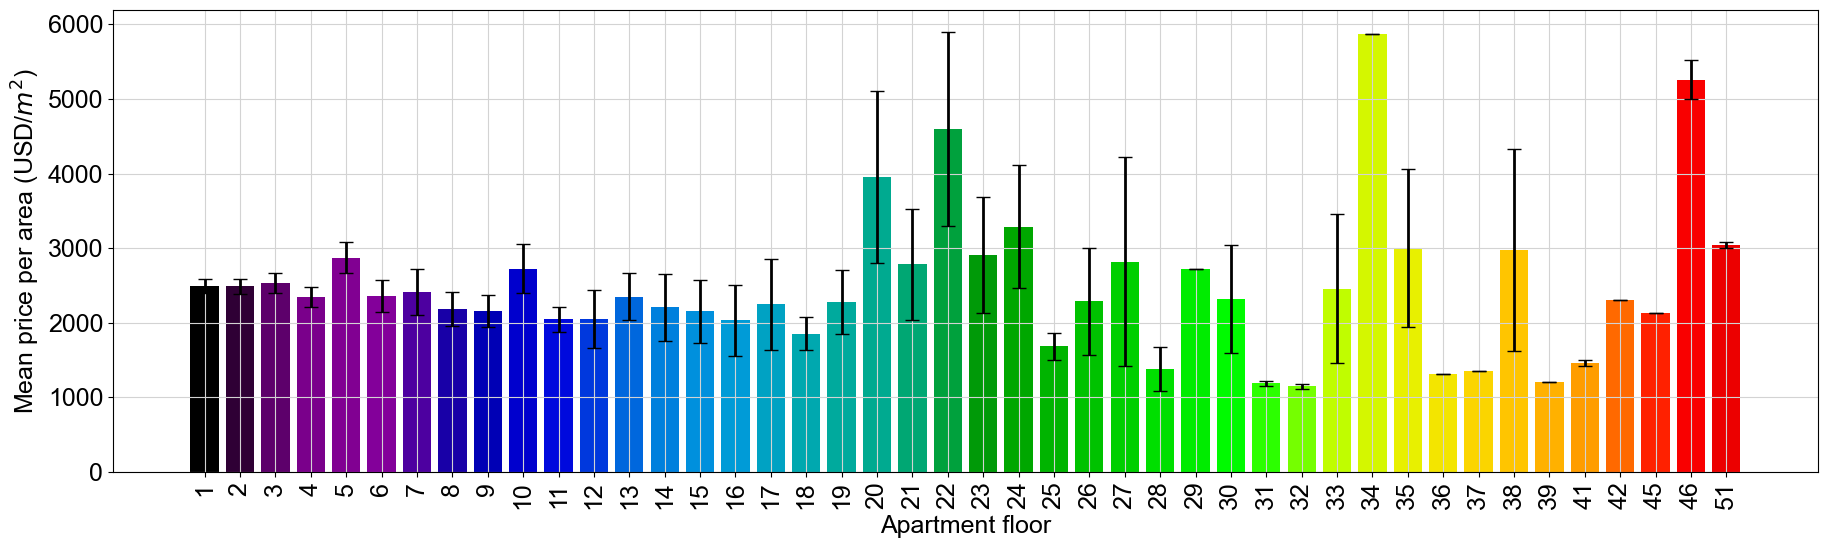

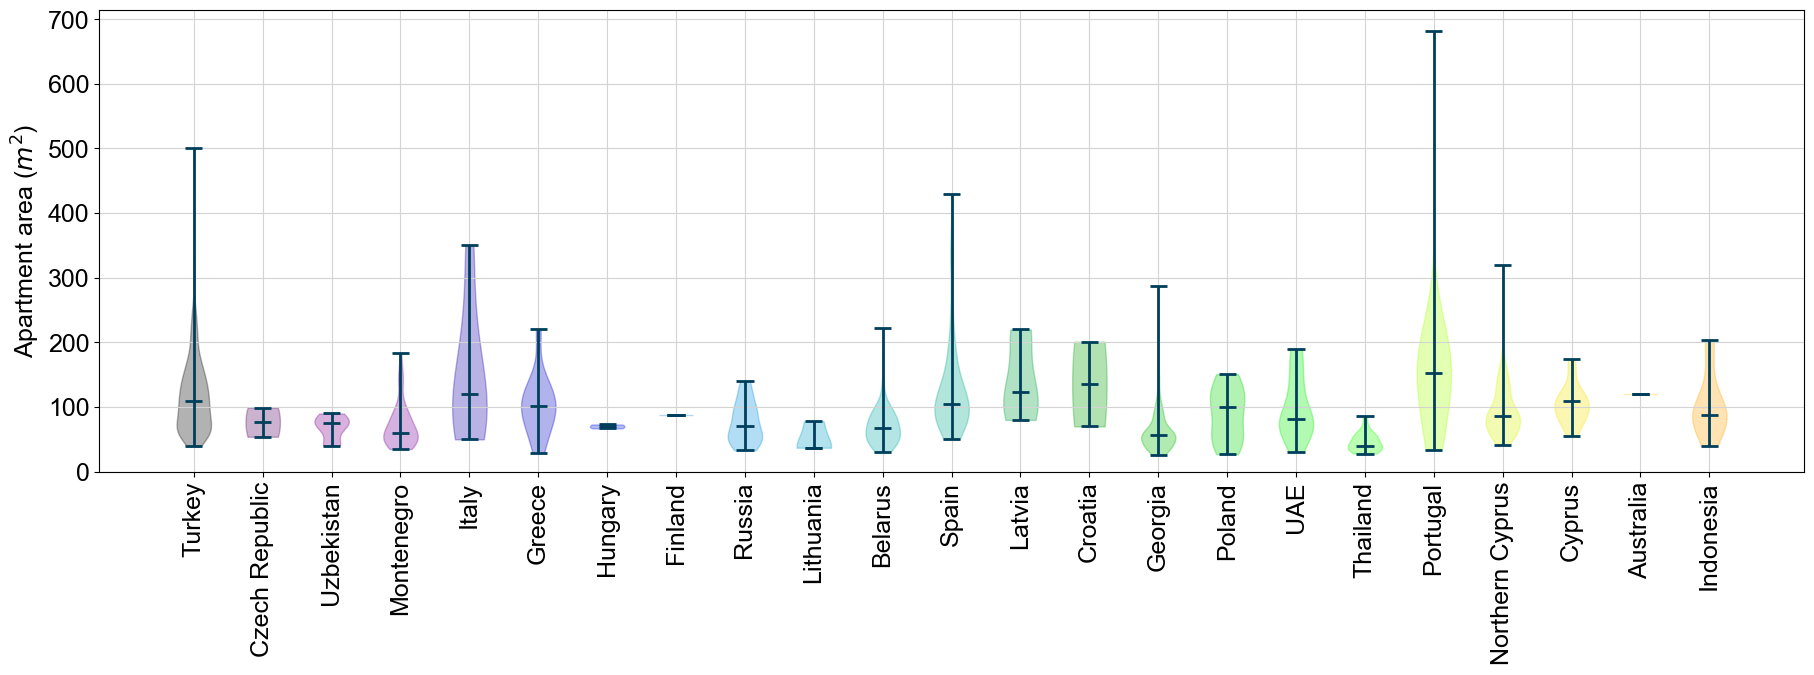

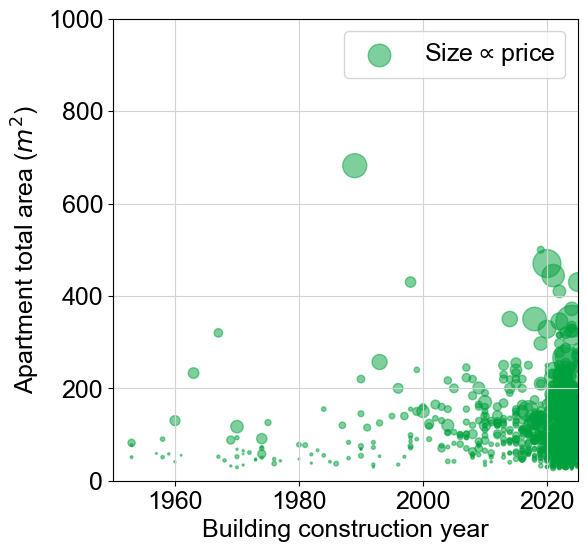

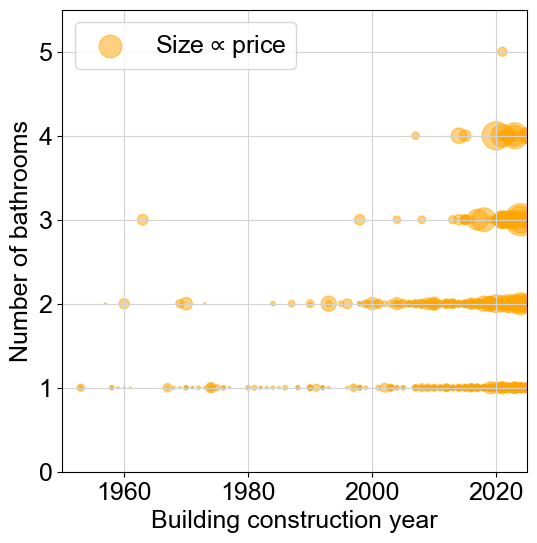

In [296]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import random
from mycolorpy import colorlist as mcp

#Improve plot defaults
mpl.rcParams['font.size'] = 18
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['figure.figsize'] = [6.0, 5.0]
mpl.rcParams['lines.markersize'] = 5
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams.update({"axes.grid" : True, "grid.color": "lightgray"})

#Load data into pandas dataframe
df=pd.read_csv('D:Desktop/real_estate/world_real_estate_data(147k).csv')
df.apartment_total_area=df.apartment_total_area.str.replace('mÂ²','')
df.apartment_total_area=df.apartment_total_area.str.replace(' ','')
df.apartment_total_area=pd.to_numeric(df.apartment_total_area)

df=df.dropna()

cpa={}
cpa_std={}
for i in df.country.unique():
    cpa[i]=np.nanmean(df.loc[df.country==i].price_in_USD/df.loc[df.country==i].apartment_total_area)
    cpa_std[i]=np.nanstd(df.loc[df.country==i].price_in_USD/df.loc[df.country==i].apartment_total_area)/np.sqrt(len(df.loc[df.country==i].apartment_total_area))
subgroups=[i for i in df.country.unique()]

colors=mcp.gen_color(cmap="nipy_spectral",n=29)
figure(1,figsize=(22,5))
x=np.arange(0,len(subgroups))
for i in x:
    plt.bar(i,cpa[subgroups[i]],yerr=cpa_std[subgroups[i]],label=str(i),capsize=5,lw=1,color=colors[i])
plt.xticks(x,subgroups,rotation=90)
plt.ylim(0,)
plt.ylabel(r'Mean price per area (USD/$m^2$)')
#plt.title('Mean Apartment Cost by Country')

violindata=[df.loc[df.apartment_rooms==i].price_in_USD/df.loc[df.apartment_rooms==i].apartment_total_area for i in df.apartment_rooms.unique()]
figure(2,figsize=(6,6))
violin_parts=plt.violinplot(violindata,[i for i in df.apartment_rooms.unique()],showmedians=True,showextrema=True)
plt.xlim(0.5,5.5)
plt.ylabel(r'Price per area (USD/$m^2$)')
plt.xlabel('Number of rooms')

for pc in violin_parts['bodies']:
    pc.set_facecolor(colors[4])
    pc.set_edgecolor(colors[4])
    
##################
cbf={}
cbf_std={}
subgroups=np.sort(np.array([i for i in df.apartment_floor.unique()])).astype(int)

for i in df.apartment_floor.unique():
    cbf[i]=np.nanmean(df.loc[df.apartment_floor==i].price_in_USD/df.loc[df.apartment_floor==i].apartment_total_area)
    cbf_std[i]=np.nanstd(df.loc[df.apartment_floor==i].price_in_USD/df.loc[df.apartment_floor==i].apartment_total_area)/np.sqrt(len(df.loc[df.apartment_floor==i].apartment_total_area))
    
    
colors=mcp.gen_color(cmap="nipy_spectral",n=50)
figure(3,figsize=(22,6))
x=np.arange(0,len(subgroups))
for i in x:
    plt.bar(i,cbf[subgroups[i]],yerr=cbf_std[subgroups[i]],label=str(i),capsize=5,lw=1,color=colors[i])
plt.xticks(x,subgroups,rotation=90)
plt.ylim(0,)
plt.ylabel(r'Mean price per area (USD/$m^2$)')
plt.xlabel('Apartment floor')
#plt.title('Mean Apartment Cost by Floor')


#######
x=np.arange(0,len([i for i in df.country.unique()]))
violindata=[df.loc[(df.country==i) & (df.apartment_total_area<1000)].apartment_total_area for i in df.country.unique()]
figure(4,figsize=(22,6))
violin_parts=plt.violinplot(violindata,x,showmedians=True,showextrema=True)
plt.xticks(np.arange(0,len([i for i in df.country.unique()])),df.country.unique(),rotation=90)
plt.ylabel(r'Apartment area ($m^2$)')
plt.ylim(0,)

colors=mcp.gen_color(cmap="nipy_spectral",n=29)
for pc,color in zip(violin_parts['bodies'],colors):
    pc.set_facecolor(color)
    pc.set_edgecolor(color)
    
figure(5,figsize=(6,6))
plt.scatter(df.building_construction_year,df.apartment_total_area,s=df.price_in_USD/10000,alpha=0.5,c=colors[12],label='Size$\propto$price')
plt.xlim(1950,2025)
plt.ylim(0,1000)
plt.ylabel(r'Apartment total area ($m^2$)')
plt.xlabel('Building construction year')
plt.legend()

figure(6,figsize=(6,6))
plt.scatter(df.building_construction_year,df.apartment_bathrooms,s=df.price_in_USD/10000,alpha=0.5,c=colors[22],label='Size$\propto$price')
plt.xlim(1950,2025)
plt.ylim(0,5.5)
plt.ylabel(r'Number of bathrooms')
plt.xlabel('Building construction year')
plt.legend()

